# Pyber Analysis
Observable Trends:
1.  As seen in the scatterplot, there is a negative correlation between the amount of rides per city and average fares.  The average fare decreases as the amount of rides increase.  There also seems to be a negative correlation between total drivers and average fare.
2.  The correlation are affected by the city types, where the urban city types tend to have higher rides and lower average prices.  Rural city types tend to have a higher average prices, but lower amount of rides.  Suburban city types lie in the middle of the other two categories.
3.  In all three of the piechart analysis, urban city types has the highest percentage for total fares, drivers, and amount of rides.  Rural city type has the lowest percetage for all three categories.

Final Note:  While the observable trends account for majority of the plots in the bubble chart.  There are some exceptions to the analysis.  One major exception is a suburban city plot that had about 65 rides per city with an average price of $32.  
My justification for not involving this city within the analysis is because it was an outlier.  While outliers are important to look at when it comes to statistical analysis, the calculations and graphs done in this analysis are only looking at observable trends to offer a data-centric guidance for new opportunities for Pyber as far as market differentiation.  While the outlier does also change the percentage values in the piecharts, it is only a minor change, which is not enough to completely change the conclusions for the market differentiation for Pyber.  However, in moving forward, I do think that it is important to look at this outlier, gather some more information on what makes this city different or if it is a data entry mistake.

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
#get the path for csv
city_path = "raw_data/city_data.csv"
ride_path = "raw_data/ride_data.csv"

In [3]:
#read the csvs
city_data_file = pd.read_csv(city_path)
ride_data_file = pd.read_csv(ride_path)

In [6]:
merged_data = pd.merge(ride_data_file, city_data_file, on="city")
groupby_cities = merged_data.groupby("city")

# Analysis Calculations
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [18]:
average_fare = groupby_cities["fare"].mean()
total_rides = groupby_cities["ride_id"].count()
total_drivers = groupby_cities["driver_count"].max()
city_type = groupby_cities["type"].max()

# Main DataFrame

In [19]:
analysis_dataframe = pd.DataFrame({"Average Fare": average_fare, 
                                   "Total Rides": total_rides, 
                                   "Total Drivers": total_drivers, 
                                   "Type": city_type})
analysis_dataframe.head()

,Average Fare,Total Drivers,Total Rides,Type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban


# 

(18, 52)

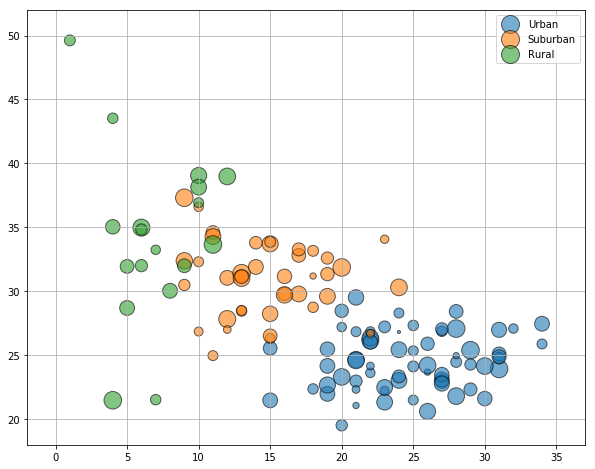

In [45]:
#scatter_grouptype = analysis_dataframe.groupby("Type")
num_drivers = analysis_dataframe.iloc[:,2]

city_types = ["Urban", "Suburban", "Rural"]
color = ["lightskyblue", "gold", "lightcoral"]
plt.figure(figsize=(10,8))
for city in city_types:
    plt.scatter(analysis_dataframe.loc[analysis_dataframe["Type"]==city]["Total Rides"], 
               analysis_dataframe.loc[analysis_dataframe["Type"]==city]["Average Fare"],
               #color=color,
               marker="o",
               alpha=.6,
               linewidth=1,
               edgecolor="black",
               s= num_drivers*10)
plt.legend(city_types)
plt.grid(True)
plt.xlim(-2, 37)
plt.ylim(18, 52)

# Bubble Plot of Ride Share

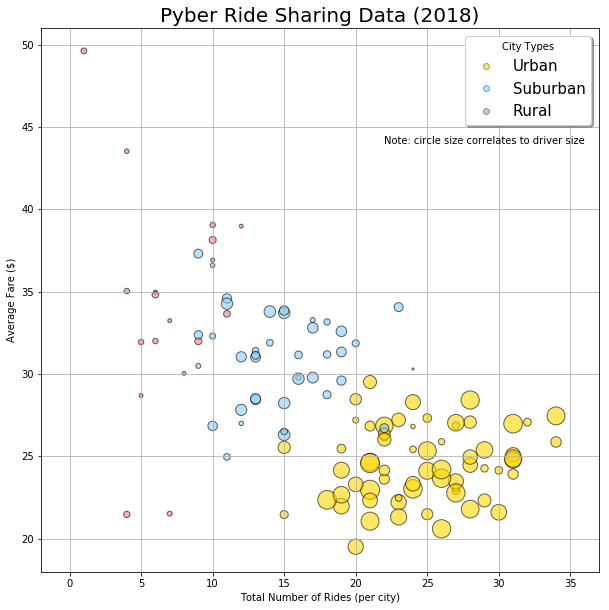

In [33]:
#colors = ("gold", "lightskyblue", "lightcoral")
plt.figure(figsize=(10,10))

def attribute_color(scattercity_type):
    colors = {"Urban": "gold", 
             "Suburban": "lightskyblue",
             "Rural": "lightcoral"}
    return colors.get(scattercity_type, "white")
color_type = list()
qty_type = len(analysis_dataframe["Type"])

for Type in range(qty_type):
    color_type.append(attribute_color(analysis_dataframe["Type"][Type]))
plt.scatter(x=analysis_dataframe["Total Rides"],
           y=analysis_dataframe["Average Fare"],
           s=analysis_dataframe["Total Drivers"]*5,
           c=color_type,
           alpha=.6,
           edgecolor="black",
           linewidths=1)
types=["Urban", "Suburban", "Rural"]
legend = list()
for type_legend in range(len(colors)):
    legend.append(mlines.Line2D([0], [0],
                               linestyle="none",
                               marker="o",
                               alpha=.6,
                               markersize=6,
                               markerfacecolor=colors[type_legend]))
plt.legend(legend,
           types,
           numpoints=1,
           fontsize=15,
           loc="best",
           shadow=True,
           title="City Types")


plt.grid()
plt.ylim(18, 51)
plt.xlim(-2, 37)
plt.title("Pyber Ride Sharing Data (2018)", fontsize=20)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.text(22, 44, "Note: circle size correlates to driver size")
plt.savefig("Pyber Ride Sharing Data.png")

# New DataFrame for the piecharts
I created a new DataFrame, since the first DataFrame calculates the average fares per city, instead of the actual total fares.

In [20]:
total_fare_bycity = groupby_cities["fare"].sum()
#Create new Dataframe to for the pie charts
pie_chartdf = pd.DataFrame({"Total Fare": total_fare_bycity, 
                                   "Total Rides": total_rides, 
                                   "Total Drivers": total_drivers, 
                                   "Type": city_type})
pie_chartdf.head()

,Total Drivers,Total Fare,Total Rides,Type
city,,,,
Alvarezhaven,21,741.79,31,Urban
Alyssaberg,67,535.85,26,Urban
Anitamouth,16,335.84,9,Suburban
Antoniomouth,21,519.75,22,Urban
Aprilchester,49,417.65,19,Urban


# Total Fares by City Type

In [21]:
groupby_type_piechart = pie_chartdf.groupby("Type")
total_fares = groupby_type_piechart["Total Fare"].sum()
type_list = total_fares.keys()
explode = (0, 0, .1)
colors = ("gold", "lightskyblue", "lightcoral")

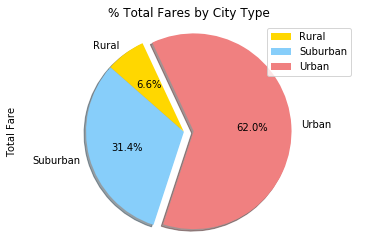

In [34]:
fares_pie = total_fares.plot(kind="pie", 
                             title="% Total Fares by City Type", 
                             autopct="%1.1f%%", 
                             explode = explode, 
                             colors=colors, 
                             startangle=115, 
                             shadow=True, 
                             legend="best")
plt.axis("equal")
plt.show()
plt.savefig("Total Fares by City Type.png")

# Total Drivers by City Type

In [23]:
total_drivers = groupby_type_piechart["Total Drivers"].sum()

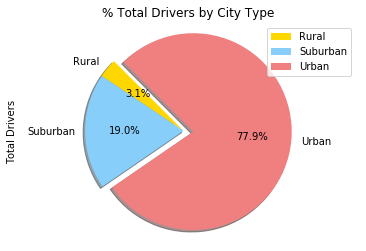

In [35]:
drivers_pie = total_drivers.plot(kind="pie", 
                                 title="% Total Drivers by City Type", 
                                 autopct="%1.1f%%", 
                                 explode = explode, 
                                 colors=colors, 
                                 startangle=135, 
                                 shadow=True, 
                                 legend="best")
plt.axis("equal")
plt.show()
plt.savefig("Total Drivers by City Type.png")

# Total Rides by City Type

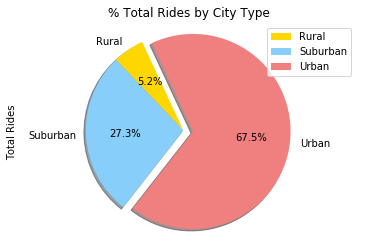

In [37]:
total_rides = groupby_type_piechart["Total Rides"].sum()
rides_pie = total_rides.plot(kind="pie", 
                             title="% Total Rides by City Type", 
                             autopct="%1.1f%%", 
                             explode = explode, 
                             colors=colors, 
                             startangle=115, 
                             shadow=True, 
                             legend="best")
plt.axis("equal")
plt.show()
plt.savefig("Total Rides by City Type.png")